In [2]:
import torch.nn as nn

In [5]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [6]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  1,  2, 10,  8,  0,  3,  7,  5]), tensor([4, 6]))

In [7]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [8]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[4.4539],
        [2.5503]], grad_fn=<AddmmBackward>)

In [9]:
linear_model.weight

Parameter containing:
tensor([[0.8498]], requires_grad=True)

In [10]:
linear_model.bias

Parameter containing:
tensor([-0.3306], requires_grad=True)

In [11]:
x = torch.ones(1)
linear_model(x)

tensor([0.5192], grad_fn=<AddBackward0>)

In [12]:
x = torch.ones(10,1)
linear_model(x)

tensor([[0.5192],
        [0.5192],
        [0.5192],
        [0.5192],
        [0.5192],
        [0.5192],
        [0.5192],
        [0.5192],
        [0.5192],
        [0.5192]], grad_fn=<AddmmBackward>)

In [14]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [16]:
import torch.optim as optim

In [17]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [18]:
linear_model.parameters()

<generator object Module.parameters at 0x000001ACEB85C348>

In [19]:

list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9418]], requires_grad=True),
 Parameter containing:
 tensor([-0.1367], requires_grad=True)]

In [27]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [28]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)    

Epoch 1, Training loss 288.0866, Validation loss 99.5094
Epoch 1000, Training loss 3.6458, Validation loss 2.6819
Epoch 2000, Training loss 2.6130, Validation loss 4.4392
Epoch 3000, Training loss 2.5796, Validation loss 4.9075

Parameter containing:
tensor([[5.5371]], requires_grad=True)
Parameter containing:
tensor([-18.2191], requires_grad=True)


# Finally a neural network

In [29]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [30]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

# Nombrar los parámetros para cada asignacion de capa

In [31]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [33]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [34]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [37]:
seq_model.hidden_linear.bias

Parameter containing:
tensor([ 0.8396, -0.9784,  0.9037, -0.1662, -0.0768, -0.4677, -0.2716,  0.7444],
       requires_grad=True)

# Monitorización de gradientes de capa oculta

In [39]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn= nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.5074, Validation loss 5.6972
Epoch 1000, Training loss 1.4543, Validation loss 6.1931
Epoch 2000, Training loss 1.4136, Validation loss 6.2757
Epoch 3000, Training loss 1.3835, Validation loss 6.3565
Epoch 4000, Training loss 1.3608, Validation loss 6.4351
Epoch 5000, Training loss 1.3432, Validation loss 6.5098
output tensor([[12.3493],
        [-0.3006]], grad_fn=<AddmmBackward>)
answer tensor([[11.],
        [ 3.]])
hidden tensor([[ 1.7806e-02],
        [ 5.4379e+00],
        [-5.4694e+00],
        [-4.0916e+00],
        [ 4.7380e+00],
        [ 4.5329e-03],
        [-9.0080e-01],
        [-3.7214e+00]])


# Grafica de modelo obtenido con neural network

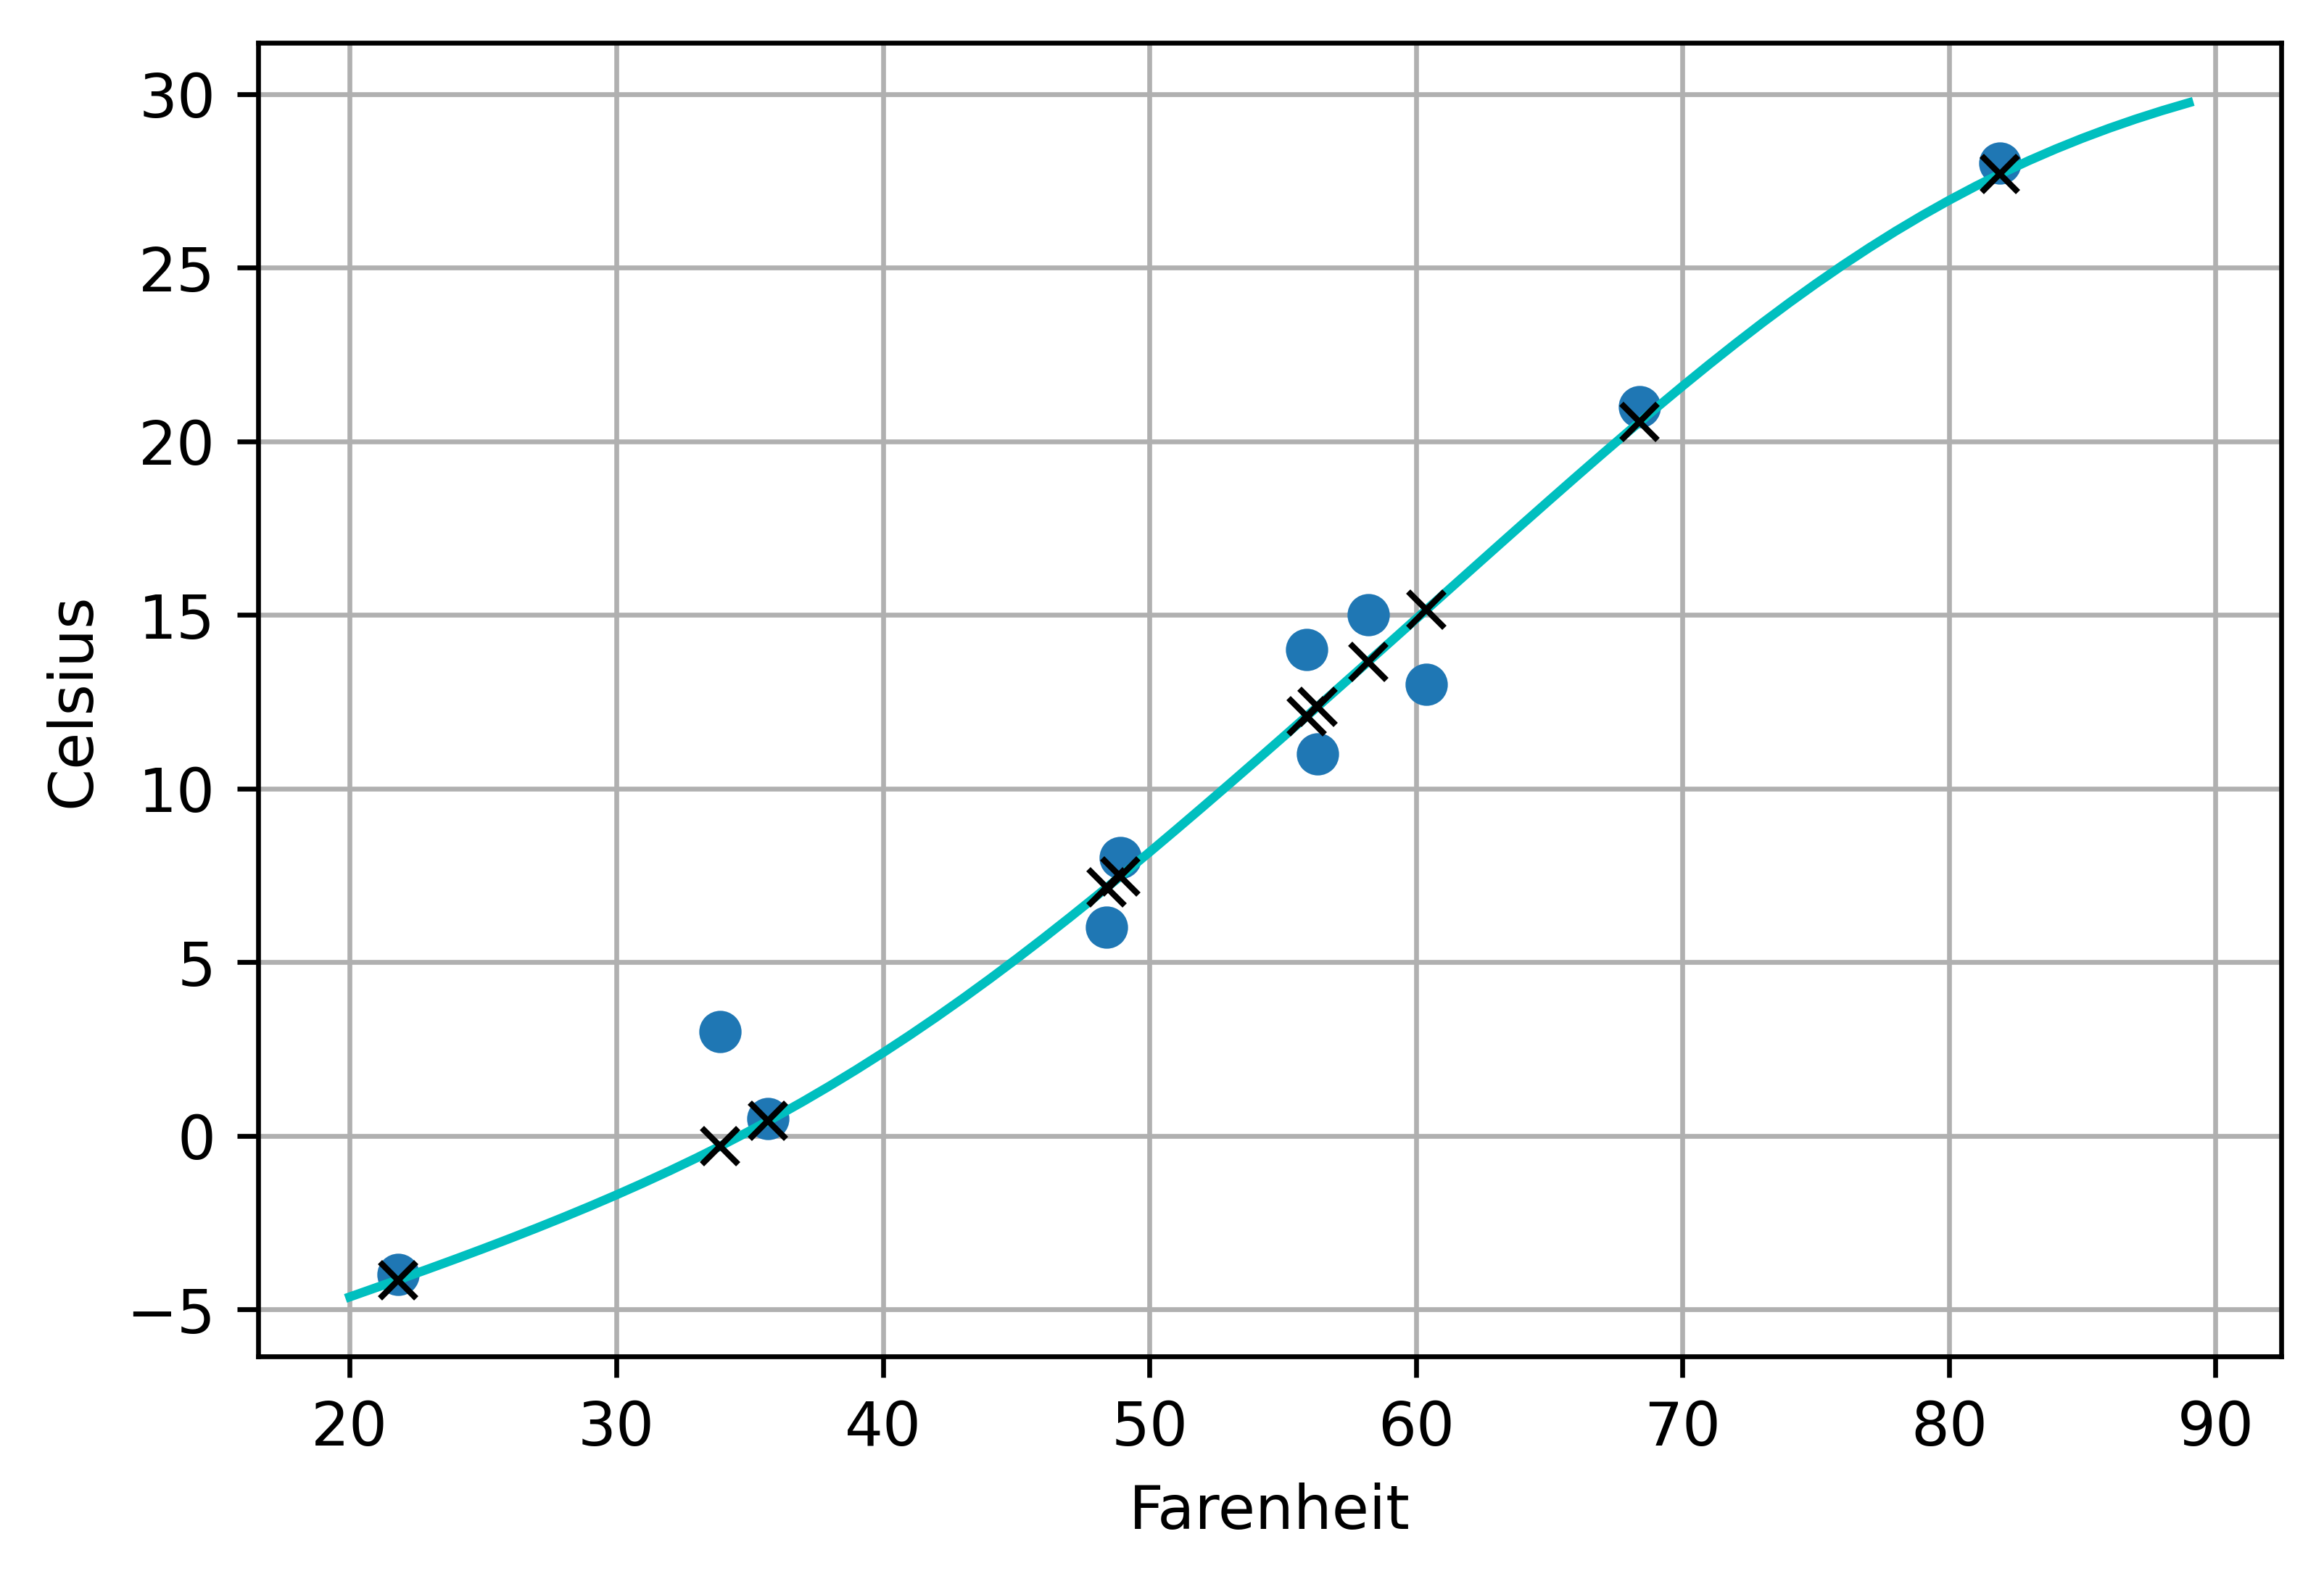

In [42]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Farenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(),'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
plt.grid()